In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import itertools

sns.set(style="dark")
plt.style.use("ggplot")
%matplotlib inline

# Load in datasets

In [2]:
plastic = pd.read_csv('plastic_2018_2022.csv')
plastic['Regency/City'] = plastic['Regency/City'].str.upper() # make upper case to make similar to indic ds
plastic['Regency/City'] = plastic['Regency/City'].str.replace('KAB. ', '') # remove any 'kab.' to make similar to indic ds
plastic

,Year,Province,Regency/City,Plastic per day (ton),Plastic per year (ton)
0,2019,Aceh,ACEH SELATAN,17.468853,6375.918288
1,2019,Aceh,ACEH TENGAH,25.242500,9213.435000
2,2019,Aceh,SIMEULUE,15.495900,5655.559350
3,2019,Aceh,GAYO LUES,6.398800,2335.562000
4,2019,Aceh,BENER MERIAH,11.816469,4312.692510
...,...,...,...,...,...
1029,2022,Sumatera Utara,HUMBANG HASUNDUTAN,7.712900,2814.984900
1030,2022,Sumatera Utara,KOTA MEDAN,243.683302,88944.436534
1031,2022,Sumatera Utara,KOTA PEMATANG SIANTAR,24.143000,8812.144000
1032,2022,Sumatera Utara,KOTA TEBING TINGGI,20.750895,7573.785300


In [3]:
indicators = pd.read_csv('5indicators_2017_2022.csv')
indicators['Population'] = indicators['Population'].str.replace(',', '') # SOME VALUES HAVE ,
indicators

,Regency/City,Year,Land Area (km2),Population,GDP,Gini,HDI
0,SIMEULUE,2017,1821.75,91372.0,1897038.43,0.307,64.41
1,ACEH SINGKIL,2017,1852.82,11949.0,2126448.17,0.321,67.37
2,ACEH SELATAN,2017,4175.38,231893.0,4855005.68,0.321,65.03
3,ACEH TENGGARA,2017,4179.12,208481.0,4245132.35,0.284,68.09
4,ACEH TIMUR,2017,5409.41,419594.0,9104763.67,0.265,66.32
...,...,...,...,...,...,...,...
3079,PUNCAK,2022,8055.00,116279.0,1612809.92,0.252,43.87
3080,DOGIYAI,2022,4237.40,119815.0,1445339.59,0.295,55.72
3081,INTAN JAYA,2022,3922.02,139236.0,1362067.73,0.299,49.25
3082,DEIYAI,2022,537.39,102168.0,1574243.63,0.150,50.42


In [4]:
bans = pd.read_csv('Data/bans_over_time.csv')
bans['start_date'] = bans['start_date'].fillna(0.0).astype(int)
bans['highest_restriction'] = bans['highest_restriction'].fillna('None')
bans

,Year,Province,Regency/City,highest_restriction,start_date
0,2019,Aceh,ACEH SELATAN,None,0
1,2019,Aceh,ACEH TENGAH,None,0
2,2019,Aceh,BENER MERIAH,None,0
3,2019,Aceh,GAYO LUES,None,0
4,2019,Aceh,KOTA LANGSA,None,0
...,...,...,...,...,...
1029,2021,Kalimantan Selatan,KOTA BANJARBARU,Ban,2016
1030,2022,Kalimantan Selatan,KOTA BANJARBARU,Ban,2016
1031,2019,Kalimantan Selatan,KOTA BANJARMASIN,Ban,2016
1032,2020,Kalimantan Selatan,KOTA BANJARMASIN,Ban,2016


# Combine both datasets for the time it shares -- 2018-2022

## 1) Create matchings

In [5]:
import difflib

# Create a list of town names from each dataset
towns_plastic = plastic['Regency/City'].tolist()
towns_indicators = indicators['Regency/City'].tolist()

# Find close matches between town names
matches_plastic_to_indic = {}
matches_indic_to_plastic = {}

# Find matches from plastic to indic
for town_plastic in towns_plastic:
    match = difflib.get_close_matches(town_plastic, towns_indicators, n=1)
    if match:
        matches_plastic_to_indic[town_plastic] = match[0]

# Find matches from indic to plastic
for town_indicators in towns_indicators:
    match = difflib.get_close_matches(town_indicators, towns_plastic, n=1)
    if match:
        matches_indic_to_plastic[town_indicators] = match[0]

# Print the matches
print("Matches from plastic to indicators:")
for town_plastic, match_indic in matches_plastic_to_indic.items():
    print(f"{town_plastic} -> {match_indic}")

Matches from plastic to indicators:
ACEH SELATAN -> ACEH SELATAN
ACEH TENGAH -> ACEH TENGAH
SIMEULUE -> SIMEULUE
GAYO LUES -> GAYO LUES
BENER MERIAH -> BENER MERIAH
KOTA BANDA ACEH -> BANDA ACEH
KOTA SABANG -> KOTA SEMARANG
KOTA LANGSA -> KOTA MALANG
ACEH TIMUR -> ACEH TIMUR
ACEH JAYA -> ACEH JAYA
KOTA SUBULUSSALAM -> SUBULUSSALAM
ACEH TENGGARA -> ACEH TENGGARA
ACEH BARAT -> ACEH BARAT
PIDIE -> PIDIE
ACEH SINGKIL -> ACEH SINGKIL
ACEH BARAT DAYA -> ACEH BARAT DAYA
NAGAN RAYA -> NAGAN RAYA
ACEH TAMIANG -> ACEH TAMIANG
PIDIE JAYA -> PIDIE JAYA
JEMBRANA -> JEMBRANA
BADUNG -> BADUNG
GIANYAR -> GIANYAR
BANGLI -> BANGLI
KARANGASEM -> KARANGASEM
BULELENG -> BULELENG
KOTA DENPASAR -> KOTA DENPASAR
TABANAN -> TABANAN
KLUNGKUNG -> KLUNGKUNG
PANDEGLANG -> PANDEGLANG
LEBAK -> LEBAK
TANGERANG -> TANGERANG
KOTA TANGERANG -> KOTA TANGERANG
KOTA CILEGON -> KOTA CILEGON
KOTA TANGERANG SELATAN -> KOTA TANGERANG SELATAN
SERANG -> SERANG
KOTA SERANG -> KOTA SERANG
BENGKULU SELATAN -> BENGKULU SELATAN
BENGK

In [6]:
len(matches_plastic_to_indic)

385

### DUPLICATES

In [7]:
# Create a list to store duplicate matches
duplicate_matches = []

# Check for duplicates
for key, value in matches_plastic_to_indic.items():
    if list(matches_plastic_to_indic.values()).count(value) > 1:
        duplicate_matches.append((key, value))

# Print duplicate matches
print("Duplicate Matches:")
for match in duplicate_matches:
    print(match)

Duplicate Matches:
('KOTA SABANG', 'KOTA SEMARANG')
('KOTA LANGSA', 'KOTA MALANG')
('KOTA SEMARANG', 'KOTA SEMARANG')
('TUBAN', 'TUBAN')
('KOTA MALANG', 'KOTA MALANG')
('SANGGAU', 'SANGGAU')
('PASANGKAYU', 'SANGGAU')
('TOBA', 'TUBAN')


Let's correct these by finding the correct 2nd match to the 1st one in the indicators dataset
- ('KOTA SABANG', 'KOTA SEMARANG') --
- ('KOTA LANGSA', 'KOTA MALANG') --
- ('KOTA SEMARANG', 'KOTA SEMARANG') -- CORRECT
- ('TUBAN', 'TUBAN') -- CORRECT
- ('KOTA MALANG', 'KOTA MALANG') -- CORRECT
- ('SANGGAU', 'SANGGAU') -- CORRECT
- ('PASANGKAYU', 'SANGGAU')
- ('TOBA', 'TUBAN')

In [8]:
# Update the matches_melted_to_area dictionary with corrected mappings
matches_plastic_to_indic.update({
    'KOTA SABANG': 'SABANG',
    'KOTA LANGSA': 'LANGSA',
    'PASANGKAYU': 'MAMUJU UTARA / PASANGKAYU',
    'TOBA': 'TOBA SAMOSIR / TOBA'
})

# Check if there are any remaining duplicate matches
duplicate_matches = []
for key, value in matches_plastic_to_indic.items():
    if list(matches_plastic_to_indic.values()).count(value) > 1:
        duplicate_matches.append((key, value))

# Print the updated matches
print("Updated Matches:")
for match in matches_plastic_to_indic.items():
    print(match)

Updated Matches:
('ACEH SELATAN', 'ACEH SELATAN')
('ACEH TENGAH', 'ACEH TENGAH')
('SIMEULUE', 'SIMEULUE')
('GAYO LUES', 'GAYO LUES')
('BENER MERIAH', 'BENER MERIAH')
('KOTA BANDA ACEH', 'BANDA ACEH')
('KOTA SABANG', 'SABANG')
('KOTA LANGSA', 'LANGSA')
('ACEH TIMUR', 'ACEH TIMUR')
('ACEH JAYA', 'ACEH JAYA')
('KOTA SUBULUSSALAM', 'SUBULUSSALAM')
('ACEH TENGGARA', 'ACEH TENGGARA')
('ACEH BARAT', 'ACEH BARAT')
('PIDIE', 'PIDIE')
('ACEH SINGKIL', 'ACEH SINGKIL')
('ACEH BARAT DAYA', 'ACEH BARAT DAYA')
('NAGAN RAYA', 'NAGAN RAYA')
('ACEH TAMIANG', 'ACEH TAMIANG')
('PIDIE JAYA', 'PIDIE JAYA')
('JEMBRANA', 'JEMBRANA')
('BADUNG', 'BADUNG')
('GIANYAR', 'GIANYAR')
('BANGLI', 'BANGLI')
('KARANGASEM', 'KARANGASEM')
('BULELENG', 'BULELENG')
('KOTA DENPASAR', 'KOTA DENPASAR')
('TABANAN', 'TABANAN')
('KLUNGKUNG', 'KLUNGKUNG')
('PANDEGLANG', 'PANDEGLANG')
('LEBAK', 'LEBAK')
('TANGERANG', 'TANGERANG')
('KOTA TANGERANG', 'KOTA TANGERANG')
('KOTA CILEGON', 'KOTA CILEGON')
('KOTA TANGERANG SELATAN', 'KOTA T

In [9]:
matches_set = set(matches_plastic_to_indic.values())
if len(matches_set) != len(matches_plastic_to_indic):
    print("Duplicate matches found!")
else:
    print("No duplicate matches.")

No duplicate matches.


In [10]:
len(matches_plastic_to_indic)

385

### UNMATCHED

In [11]:
# Get the unique town names from plastic
unique_towns_plastic = plastic['Regency/City'].unique()

# Find unmatched towns
unmatched_towns = [town for town in unique_towns_plastic if town not in matches_plastic_to_indic]

# Print unmatched towns
print("Unmatched towns:")
for town in unmatched_towns:
    print(town)

Unmatched towns:


In [12]:
len(matches_plastic_to_indic)

385

## 2) Merge!

In [13]:
# indic_from2018 = indicators[indicators['Year']
indic_from2018 = indicators.drop(indicators[indicators['Regency/City']==2018].index)
indic_from2018

,Regency/City,Year,Land Area (km2),Population,GDP,Gini,HDI
0,SIMEULUE,2017,1821.75,91372.0,1897038.43,0.307,64.41
1,ACEH SINGKIL,2017,1852.82,11949.0,2126448.17,0.321,67.37
2,ACEH SELATAN,2017,4175.38,231893.0,4855005.68,0.321,65.03
3,ACEH TENGGARA,2017,4179.12,208481.0,4245132.35,0.284,68.09
4,ACEH TIMUR,2017,5409.41,419594.0,9104763.67,0.265,66.32
...,...,...,...,...,...,...,...
3079,PUNCAK,2022,8055.00,116279.0,1612809.92,0.252,43.87
3080,DOGIYAI,2022,4237.40,119815.0,1445339.59,0.295,55.72
3081,INTAN JAYA,2022,3922.02,139236.0,1362067.73,0.299,49.25
3082,DEIYAI,2022,537.39,102168.0,1574243.63,0.150,50.42


In [14]:
plastic

,Year,Province,Regency/City,Plastic per day (ton),Plastic per year (ton)
0,2019,Aceh,ACEH SELATAN,17.468853,6375.918288
1,2019,Aceh,ACEH TENGAH,25.242500,9213.435000
2,2019,Aceh,SIMEULUE,15.495900,5655.559350
3,2019,Aceh,GAYO LUES,6.398800,2335.562000
4,2019,Aceh,BENER MERIAH,11.816469,4312.692510
...,...,...,...,...,...
1029,2022,Sumatera Utara,HUMBANG HASUNDUTAN,7.712900,2814.984900
1030,2022,Sumatera Utara,KOTA MEDAN,243.683302,88944.436534
1031,2022,Sumatera Utara,KOTA PEMATANG SIANTAR,24.143000,8812.144000
1032,2022,Sumatera Utara,KOTA TEBING TINGGI,20.750895,7573.785300


In [15]:
# Swap keys and values in the dictionary
matches_plastic_to_indic_swapped = {v: k for k, v in matches_plastic_to_indic.items()}

# Use the swapped dictionary for mapping
indic_from2018['Matched_town'] = indic_from2018['Regency/City'].map(matches_plastic_to_indic_swapped)

# Merge datasets based on the matches from plastic to indic
merged_data = pd.merge(plastic, indic_from2018, how='left', left_on=['Regency/City', 'Year'], right_on=['Matched_town', 'Year'])

# Display the new merged dataset
merged_data

,Year,Province,Regency/City_x,Plastic per day (ton),Plastic per year (ton),Regency/City_y,Land Area (km2),Population,GDP,Gini,HDI,Matched_town
0,2019,Aceh,ACEH SELATAN,17.468853,6375.918288,ACEH SELATAN,4175.38,238081,5.479426e+06,0.273,66.90,ACEH SELATAN
1,2019,Aceh,ACEH TENGAH,25.242500,9213.435000,ACEH TENGAH,4468.42,212494,7.472446e+06,0.256,73.14,ACEH TENGAH
2,2019,Aceh,SIMEULUE,15.495900,5655.559350,SIMEULUE,1821.75,93228,2.211886e+06,0.340,65.70,SIMEULUE
3,2019,Aceh,GAYO LUES,6.398800,2335.562000,GAYO LUES,5541.29,94100,2.608734e+06,0.290,66.87,GAYO LUES
4,2019,Aceh,BENER MERIAH,11.816469,4312.692510,BENER MERIAH,1907.40,148175,4.423115e+06,0.267,72.97,BENER MERIAH
...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2022,Sumatera Utara,HUMBANG HASUNDUTAN,7.712900,2814.984900,HUMBANG HASUNDUTAN,2351.51,202299.0,6.919485e+06,0.258,70.32,HUMBANG HASUNDUTAN
1030,2022,Sumatera Utara,KOTA MEDAN,243.683302,88944.436534,KOTA MEDAN,279.29,2494512.0,2.801590e+08,0.399,81.76,KOTA MEDAN
1031,2022,Sumatera Utara,KOTA PEMATANG SIANTAR,24.143000,8812.144000,KOTA PEMATANG SIANTAR,75.92,274056.0,1.520831e+07,0.321,79.70,KOTA PEMATANG SIANTAR
1032,2022,Sumatera Utara,KOTA TEBING TINGGI,20.750895,7573.785300,KOTA TEBING TINGGI,39.17,177785.0,6.931267e+06,0.334,76.17,KOTA TEBING TINGGI


In [16]:
# Drop redundant columns
merged_data.drop(columns=['Regency/City_y','Matched_town'], inplace=True)
merged_data.rename(columns={'Regency/City_x': 'Regency/City'}, inplace=True)
merged_data

,Year,Province,Regency/City,Plastic per day (ton),Plastic per year (ton),Land Area (km2),Population,GDP,Gini,HDI
0,2019,Aceh,ACEH SELATAN,17.468853,6375.918288,4175.38,238081,5.479426e+06,0.273,66.90
1,2019,Aceh,ACEH TENGAH,25.242500,9213.435000,4468.42,212494,7.472446e+06,0.256,73.14
2,2019,Aceh,SIMEULUE,15.495900,5655.559350,1821.75,93228,2.211886e+06,0.340,65.70
3,2019,Aceh,GAYO LUES,6.398800,2335.562000,5541.29,94100,2.608734e+06,0.290,66.87
4,2019,Aceh,BENER MERIAH,11.816469,4312.692510,1907.40,148175,4.423115e+06,0.267,72.97
...,...,...,...,...,...,...,...,...,...,...
1029,2022,Sumatera Utara,HUMBANG HASUNDUTAN,7.712900,2814.984900,2351.51,202299.0,6.919485e+06,0.258,70.32
1030,2022,Sumatera Utara,KOTA MEDAN,243.683302,88944.436534,279.29,2494512.0,2.801590e+08,0.399,81.76
1031,2022,Sumatera Utara,KOTA PEMATANG SIANTAR,24.143000,8812.144000,75.92,274056.0,1.520831e+07,0.321,79.70
1032,2022,Sumatera Utara,KOTA TEBING TINGGI,20.750895,7573.785300,39.17,177785.0,6.931267e+06,0.334,76.17


In [17]:
merged_data[merged_data.isna().any(axis=1)]

,Year,Province,Regency/City,Plastic per day (ton),Plastic per year (ton),Land Area (km2),Population,GDP,Gini,HDI
715,2021,Papua Pegunungan,LANNY JAYA,NaN,NaN,6077.4,198780.0,2020051.93,0.293,48.68


In [18]:
merged_data = pd.merge(merged_data, bans, how='left', left_on=['Regency/City', 'Year'], right_on=['Regency/City', 'Year'])
merged_data

,Year,Province_x,Regency/City,Plastic per day (ton),Plastic per year (ton),Land Area (km2),Population,GDP,Gini,HDI,Province_y,highest_restriction,start_date
0,2019,Aceh,ACEH SELATAN,17.468853,6375.918288,4175.38,238081,5.479426e+06,0.273,66.90,Aceh,None,0
1,2019,Aceh,ACEH TENGAH,25.242500,9213.435000,4468.42,212494,7.472446e+06,0.256,73.14,Aceh,None,0
2,2019,Aceh,SIMEULUE,15.495900,5655.559350,1821.75,93228,2.211886e+06,0.340,65.70,Aceh,None,0
3,2019,Aceh,GAYO LUES,6.398800,2335.562000,5541.29,94100,2.608734e+06,0.290,66.87,Aceh,None,0
4,2019,Aceh,BENER MERIAH,11.816469,4312.692510,1907.40,148175,4.423115e+06,0.267,72.97,Aceh,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2022,Sumatera Utara,HUMBANG HASUNDUTAN,7.712900,2814.984900,2351.51,202299.0,6.919485e+06,0.258,70.32,Sumatera Utara,Fee,2020
1030,2022,Sumatera Utara,KOTA MEDAN,243.683302,88944.436534,279.29,2494512.0,2.801590e+08,0.399,81.76,Sumatera Utara,Ban,2019
1031,2022,Sumatera Utara,KOTA PEMATANG SIANTAR,24.143000,8812.144000,75.92,274056.0,1.520831e+07,0.321,79.70,Sumatera Utara,Fee,2020
1032,2022,Sumatera Utara,KOTA TEBING TINGGI,20.750895,7573.785300,39.17,177785.0,6.931267e+06,0.334,76.17,Sumatera Utara,Ban,2018


In [19]:
# Drop redundant columns
merged_data.drop(columns=['Province_y'], inplace=True)
merged_data.rename(columns={'Province_x': 'Province'}, inplace=True)

## 3) Fix any issues

In [20]:
# Fix issue of having start date of having no restrictions as 0 -- have it as that year at least
merged_data.loc[merged_data['start_date'] == 0, 'start_date'] = merged_data.loc[merged_data['start_date'] == 0, 'Year']
merged_data

,Year,Province,Regency/City,Plastic per day (ton),Plastic per year (ton),Land Area (km2),Population,GDP,Gini,HDI,highest_restriction,start_date
0,2019,Aceh,ACEH SELATAN,17.468853,6375.918288,4175.38,238081,5.479426e+06,0.273,66.90,None,2019
1,2019,Aceh,ACEH TENGAH,25.242500,9213.435000,4468.42,212494,7.472446e+06,0.256,73.14,None,2019
2,2019,Aceh,SIMEULUE,15.495900,5655.559350,1821.75,93228,2.211886e+06,0.340,65.70,None,2019
3,2019,Aceh,GAYO LUES,6.398800,2335.562000,5541.29,94100,2.608734e+06,0.290,66.87,None,2019
4,2019,Aceh,BENER MERIAH,11.816469,4312.692510,1907.40,148175,4.423115e+06,0.267,72.97,None,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2022,Sumatera Utara,HUMBANG HASUNDUTAN,7.712900,2814.984900,2351.51,202299.0,6.919485e+06,0.258,70.32,Fee,2020
1030,2022,Sumatera Utara,KOTA MEDAN,243.683302,88944.436534,279.29,2494512.0,2.801590e+08,0.399,81.76,Ban,2019
1031,2022,Sumatera Utara,KOTA PEMATANG SIANTAR,24.143000,8812.144000,75.92,274056.0,1.520831e+07,0.321,79.70,Fee,2020
1032,2022,Sumatera Utara,KOTA TEBING TINGGI,20.750895,7573.785300,39.17,177785.0,6.931267e+06,0.334,76.17,Ban,2018


In [21]:
# fix issue of gini some being 0-1 range some not
# Define a function to divide values by 1000 if they are not in the 0-1 range
def normalize_gini(value):
    if value > 1:
        return value / 1000
    else:
        return value

# Apply the function to the 'Gini' column
merged_data['Gini'] = merged_data['Gini'].apply(normalize_gini)
merged_data

,Year,Province,Regency/City,Plastic per day (ton),Plastic per year (ton),Land Area (km2),Population,GDP,Gini,HDI,highest_restriction,start_date
0,2019,Aceh,ACEH SELATAN,17.468853,6375.918288,4175.38,238081,5.479426e+06,0.273,66.90,None,2019
1,2019,Aceh,ACEH TENGAH,25.242500,9213.435000,4468.42,212494,7.472446e+06,0.256,73.14,None,2019
2,2019,Aceh,SIMEULUE,15.495900,5655.559350,1821.75,93228,2.211886e+06,0.340,65.70,None,2019
3,2019,Aceh,GAYO LUES,6.398800,2335.562000,5541.29,94100,2.608734e+06,0.290,66.87,None,2019
4,2019,Aceh,BENER MERIAH,11.816469,4312.692510,1907.40,148175,4.423115e+06,0.267,72.97,None,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2022,Sumatera Utara,HUMBANG HASUNDUTAN,7.712900,2814.984900,2351.51,202299.0,6.919485e+06,0.258,70.32,Fee,2020
1030,2022,Sumatera Utara,KOTA MEDAN,243.683302,88944.436534,279.29,2494512.0,2.801590e+08,0.399,81.76,Ban,2019
1031,2022,Sumatera Utara,KOTA PEMATANG SIANTAR,24.143000,8812.144000,75.92,274056.0,1.520831e+07,0.321,79.70,Fee,2020
1032,2022,Sumatera Utara,KOTA TEBING TINGGI,20.750895,7573.785300,39.17,177785.0,6.931267e+06,0.334,76.17,Ban,2018


In [22]:
merged_data.to_csv("df_all_20182022.csv", index=False)

# EDA

## Initial insights on features to plastic pollution

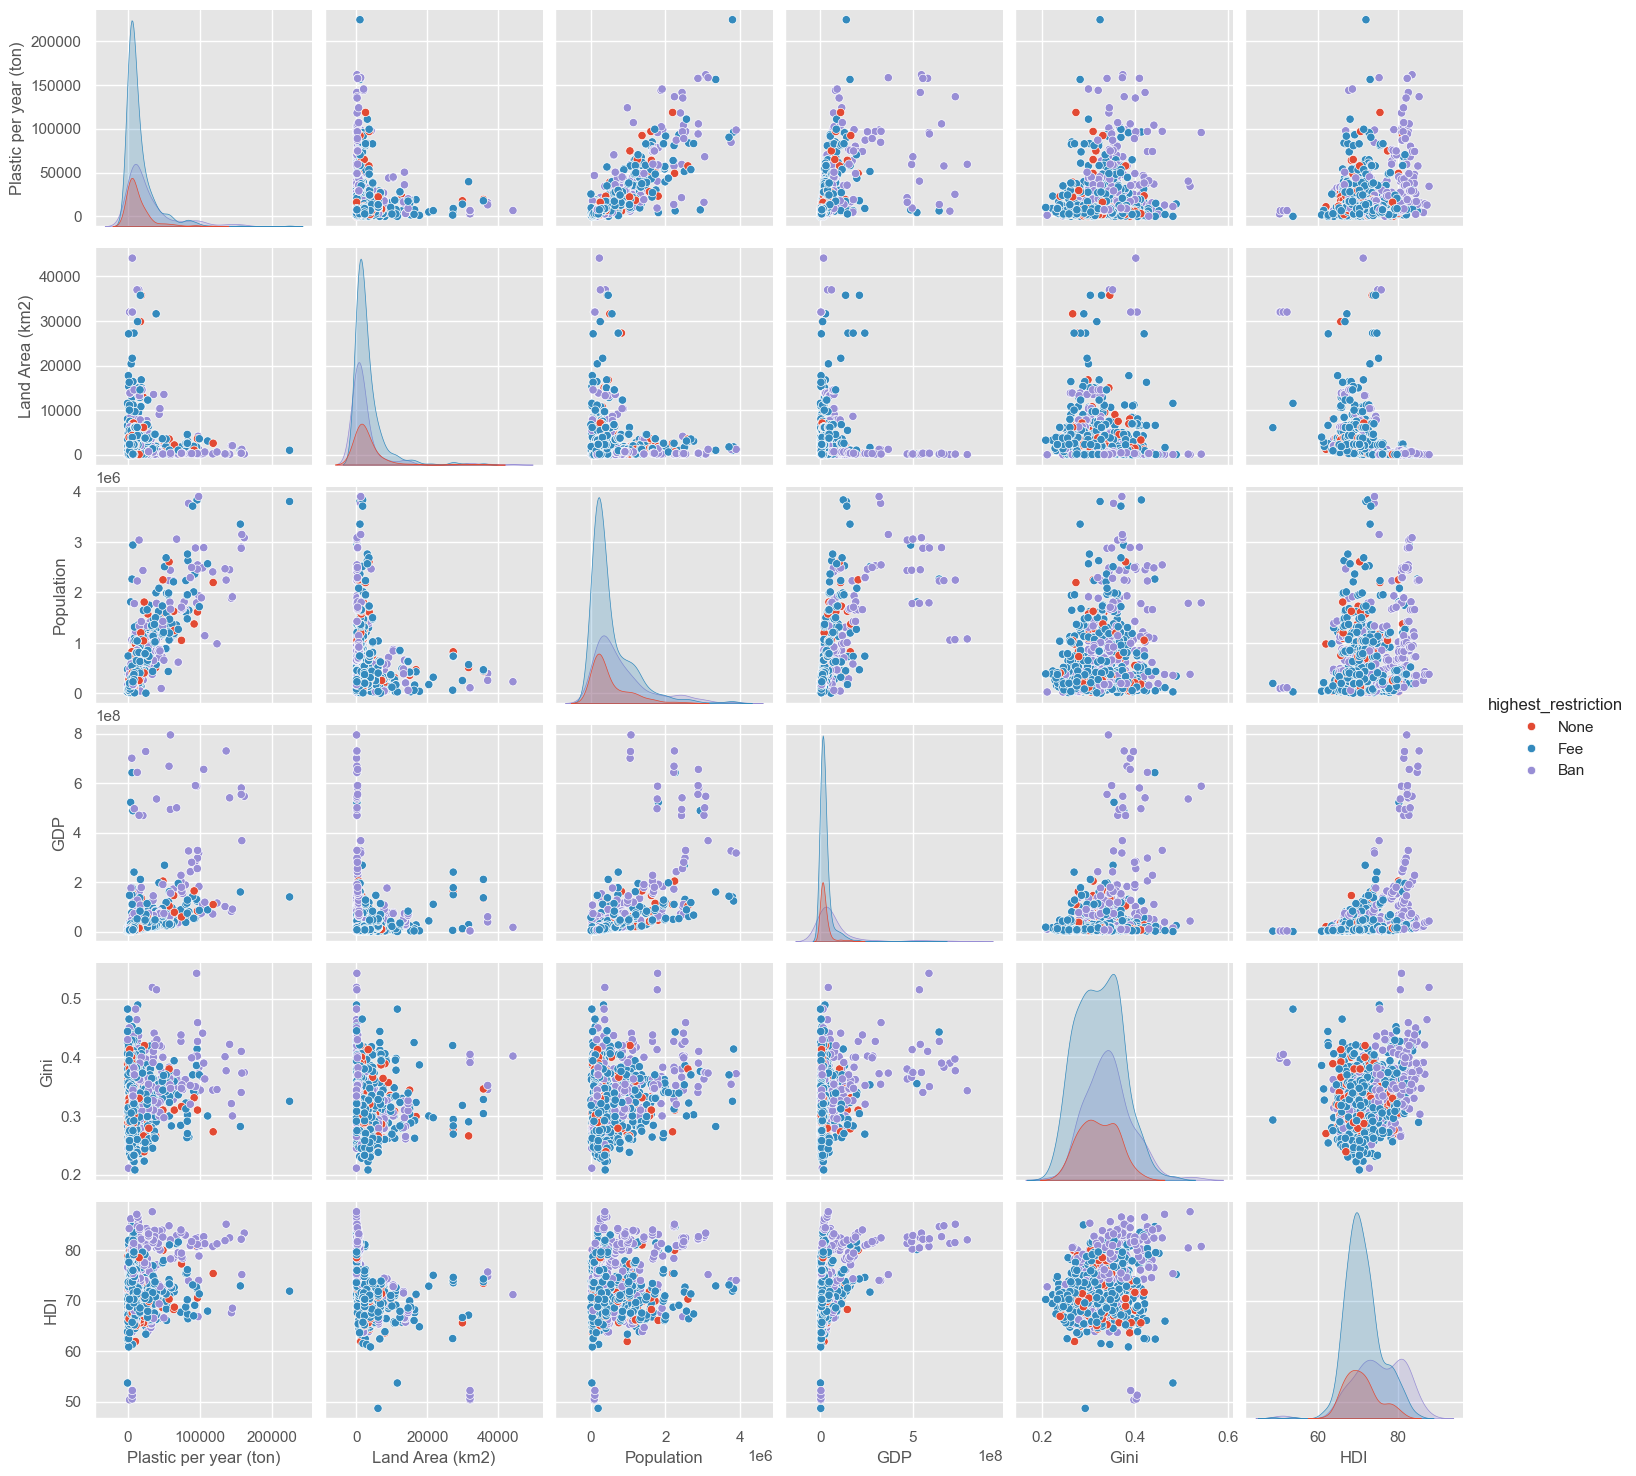

In [23]:
# prevent population from being seen as a categorical column and thus not shown in pair plot
merged_data['Population'] = pd.to_numeric(merged_data['Population'], errors='coerce') 
sns.pairplot(merged_data.drop(['Year','Regency/City','Plastic per day (ton)','start_date'], axis=1),hue='highest_restriction')

##### Land area
- no clear relationship, but highest plastic per year happen at smallest land areas; less than 50000km2
- most regency/city's land area is less than 20000km2
##### Population
- upward trend; population increase = plastic increase
- most population is less than 1.5x10^6
##### GDP
- generally upward trend for GDP less than 2x10^8, which is where most points are
- but then no clear trend for higher GDP than that
- most of the places with bans have higher GDPs
##### Gini
- no clear relationship
- most of the higher gini indexes have bans 
##### HDI
- no clear relationship
- most HDI above 60
- for the HDI below 60, all have plastic per year less than 50000 tons

### Overarching insights

#### See trend divided by each restriction

In [24]:
# Filter data for different restrictions
fee_data = merged_data[merged_data['highest_restriction'] == 'Fee']
ban_data = merged_data[merged_data['highest_restriction'] == 'Ban']
none_data = merged_data[merged_data['highest_restriction']== 'None']

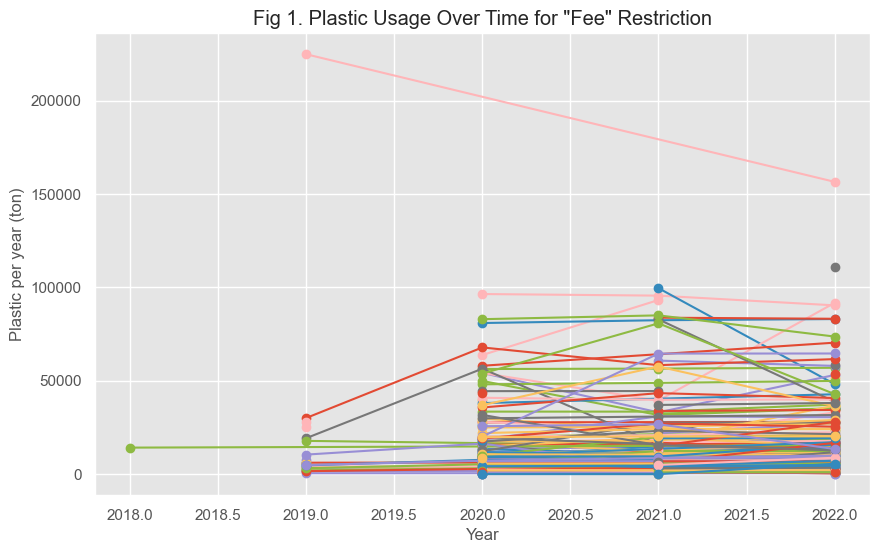

In [25]:
plt.figure(figsize=(10, 6))
for regency, group in fee_data.groupby('Regency/City'):
    plt.plot(group['Year'], group['Plastic per year (ton)'], label=regency, marker='o')
plt.title('Fig 1. Plastic Usage Over Time for "Fee" Restriction')
plt.xlabel('Year')
plt.ylabel('Plastic per year (ton)')
# plt.legend(title='Regency/City', bbox_to_anchor=(1, 1))
plt.show()

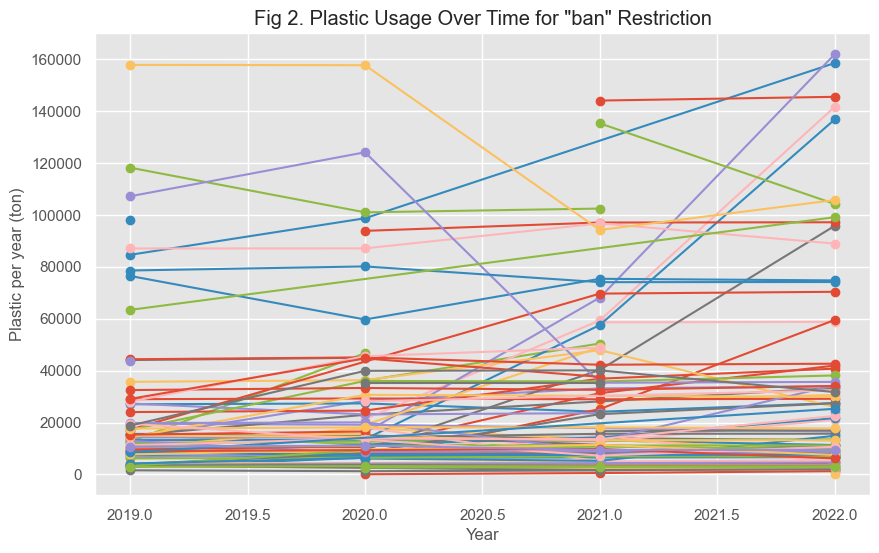

In [26]:
plt.figure(figsize=(10, 6))
for regency, group in ban_data.groupby('Regency/City'):
    plt.plot(group['Year'], group['Plastic per year (ton)'], label=regency, marker='o')
plt.title('Fig 2. Plastic Usage Over Time for "ban" Restriction')
plt.xlabel('Year')
plt.ylabel('Plastic per year (ton)')
# plt.legend(title='Regency/City', bbox_to_anchor=(1, 1))
plt.show()

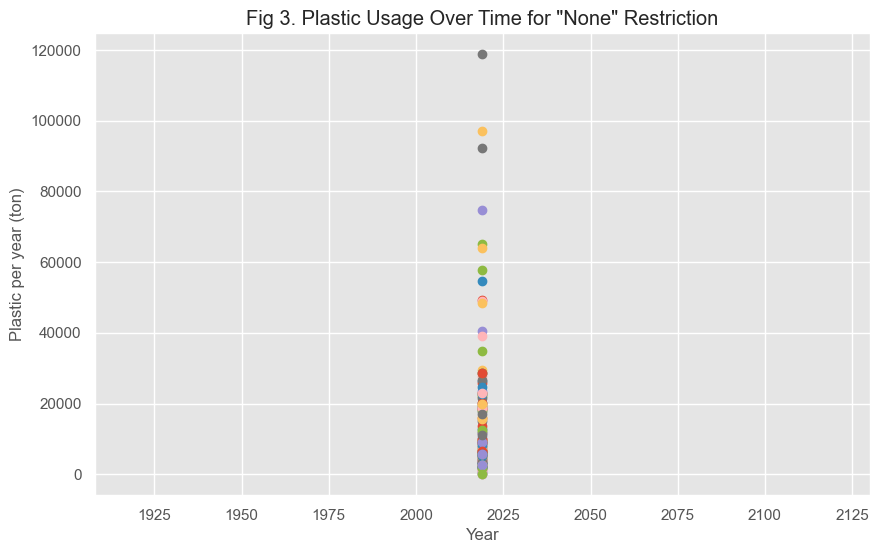

In [27]:
# Plot for 'None' restriction -- [to do] fix the 1 regency/city with until 2022, then rerun with years since start as the x-axis
plt.figure(figsize=(10, 6))
for regency, group in none_data.groupby('Regency/City'):
    plt.plot(group['Year'], group['Plastic per year (ton)'], label=regency, marker='o')
plt.title('Fig 3. Plastic Usage Over Time for "None" Restriction')
plt.xlabel('Year')
plt.ylabel('Plastic per year (ton)')
# plt.legend(title='Regency/City', bbox_to_anchor=(1, 1))
plt.show()

**problems seen!** 
bans do not start at the same time so in some years have larger total plastic -- but not because bans are ineffective, simply because the number of cities that get categorized as having bans increases every year. 
**let's fix this by making the x-axis years-since-start so the starting point is more fair, THEN average**

#### See effect of bans, fees, and no restrictions overall

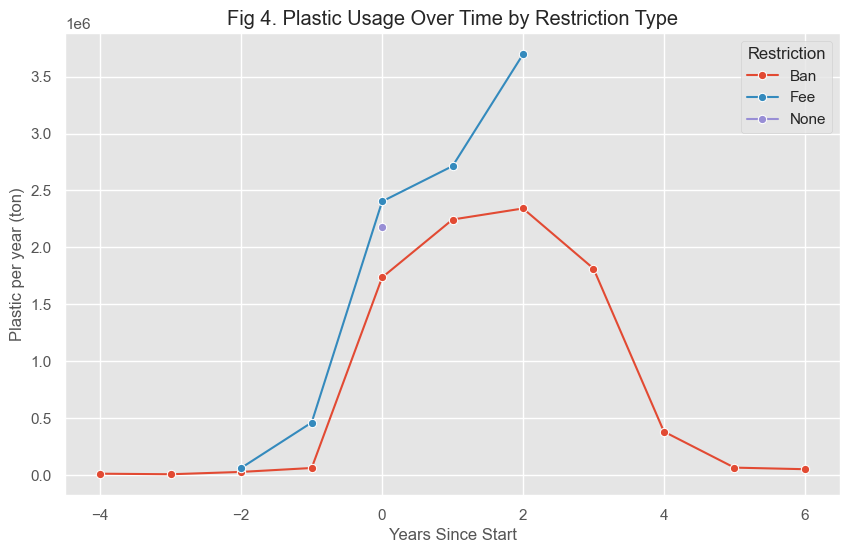

In [28]:
# Replace start_date values equal to 0 with the corresponding Year values
merged_data.loc[merged_data['start_date'] == 0, 'start_date'] = merged_data.loc[merged_data['start_date'] == 0, 'Year']

# Calculate years since start for each row
merged_data['Years Since Start'] = merged_data['Year'] - merged_data['start_date']

# Aggregate plastic usage data by restriction type for each year
agg_data = merged_data[['Years Since Start', 'highest_restriction', 'Plastic per year (ton)']].groupby(['Years Since Start', 'highest_restriction']).sum().reset_index()

# Plot total plastic usage over time for each restriction type with years since start as x-axis
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_data, x='Years Since Start', y='Plastic per year (ton)', hue='highest_restriction', marker='o')
plt.title('Fig 4. Plastic Usage Over Time by Restriction Type')
plt.xlabel('Years Since Start')
plt.ylabel('Plastic per year (ton)')
plt.legend(title='Restriction')
plt.show()

/var/folders/0j/n7xzy3zj28l9wpm__mh81z0m0000gp/T/ipykernel_40105/4151431186.py:8: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  merged_data['Plastic Growth Rate'] = merged_data.groupby('Regency/City')['Plastic per year (ton)'].pct_change() * 100


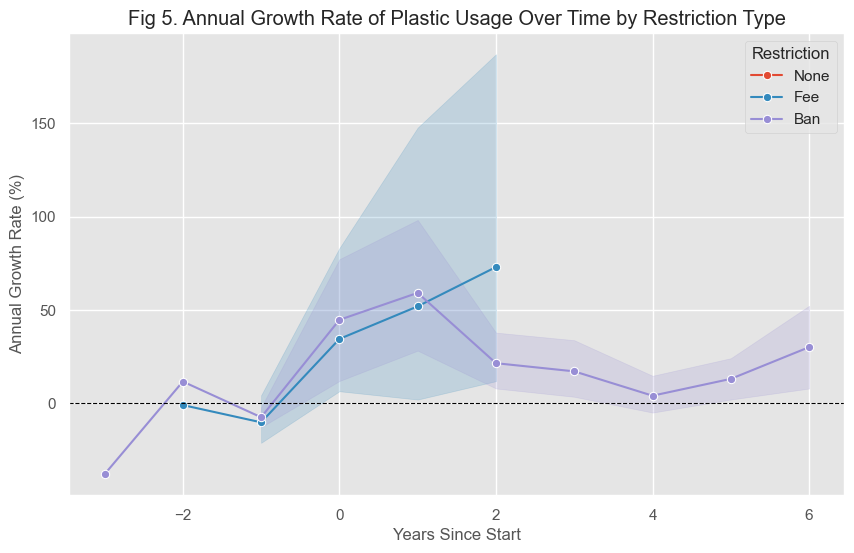

In [29]:
# Replace start_date values equal to 0 with the corresponding Year values
merged_data.loc[merged_data['start_date'] == 0, 'start_date'] = merged_data.loc[merged_data['start_date'] == 0, 'Year']

# Calculate years since start for each row
merged_data['Years Since Start'] = merged_data['Year'] - merged_data['start_date']

# Calculate annual growth rate of plastic usage
merged_data['Plastic Growth Rate'] = merged_data.groupby('Regency/City')['Plastic per year (ton)'].pct_change() * 100

# Plot the annual growth rate over time with years since start as x-axis
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='Years Since Start', y='Plastic Growth Rate', hue='highest_restriction', marker='o')
plt.title('Fig 5. Annual Growth Rate of Plastic Usage Over Time by Restriction Type')
plt.xlabel('Years Since Start')
plt.ylabel('Annual Growth Rate (%)')
plt.legend(title='Restriction')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)  # Add horizontal line at y=0
plt.show()

- comparing the shape of the trend for bans in the combined graph (Fig 4; where 1 line = total for all places with bans) vs. the individual graph (Fig 2; where 1 line = 1 regency/city with a ban), we see that while in total there is generally a decreasing trend, some lines in the individual graph are increasing -- in other words, some regency/cities have ineffective bans. this may be a source of discrepancy as this 'outlier' trend may be dragging the total up.
- bans only cause a decrease in plastic around 2 years after start, seen by how that's when a decreasing line starts (Fig 4)

# Feature Engineering 

Before moving on to modeling, need to ensure 1) relationships 2) collinearity not present. As we see above, there is possibility of our features having a linear relationship with each other, but need to transform the data so it is more clear.

In [30]:
## apply log, sqrt, cube transform for all 
merged_data['log_plasticyear'] = np.log10(merged_data['Plastic per year (ton)'])
merged_data['squareroot_plasticyear'] = np.sqrt(merged_data['Plastic per year (ton)'])

merged_data['log_landarea'] = np.log10(merged_data['Land Area (km2)'])
merged_data['log_GDP'] = np.log10(merged_data['GDP'])
merged_data['log_Gini'] = np.log10(merged_data['Gini'])
merged_data['log_HDI'] = np.log10(merged_data['HDI'])

merged_data['squareroot_landarea'] = np.sqrt(merged_data['Land Area (km2)'])
merged_data['squareroot_GDP'] = np.sqrt(merged_data['GDP'])
merged_data['squareroot_Gini'] = np.sqrt(merged_data['Gini'])
merged_data['squareroot_HDI'] = np.sqrt(merged_data['HDI'])

/Users/sandy/opt/anaconda3/envs/ESthesisSW/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
corr_matrix = merged_data.drop(['Year','Province','Regency/City','Plastic per day (ton)','highest_restriction','start_date'], axis=1).corr()
print(corr_matrix.index)
corr_matrix 

Index(['Plastic per year (ton)', 'Land Area (km2)', 'Population', 'GDP',
       'Gini', 'HDI', 'Years Since Start', 'Plastic Growth Rate',
       'log_plasticyear', 'squareroot_plasticyear', 'log_landarea', 'log_GDP',
       'log_Gini', 'log_HDI', 'squareroot_landarea', 'squareroot_GDP',
       'squareroot_Gini', 'squareroot_HDI'],
      dtype='object')


,Plastic per year (ton),Land Area (km2),Population,GDP,Gini,HDI,Years Since Start,Plastic Growth Rate,log_plasticyear,squareroot_plasticyear,log_landarea,log_GDP,log_Gini,log_HDI,squareroot_landarea,squareroot_GDP,squareroot_Gini,squareroot_HDI
Plastic per year (ton),1.000000,-0.105880,0.830552,0.523487,0.197681,0.263372,0.105239,-0.013002,0.783569,0.953139,-0.071482,0.647427,0.200882,0.257722,-0.123876,0.641098,0.199533,0.260690
Land Area (km2),-0.105880,1.000000,-0.138727,-0.040796,-0.110268,-0.347768,-0.014353,-0.007338,-0.041270,-0.093415,0.662345,-0.001222,-0.112404,-0.358150,0.925415,-0.013361,-0.111591,-0.352896
Population,0.830552,-0.138727,1.000000,0.633551,0.235942,0.232021,0.024067,-0.014129,0.723417,0.836791,-0.057577,0.757075,0.240617,0.227445,-0.142911,0.755452,0.238667,0.229854
GDP,0.523487,-0.040796,0.633551,1.000000,0.257314,0.404082,0.024099,0.017303,0.399237,0.491647,-0.164647,0.721132,0.247230,0.390643,-0.116967,0.938225,0.252420,0.397674
Gini,0.197681,-0.110268,0.235942,0.257314,1.000000,0.283490,0.047493,-0.037040,0.203996,0.202633,-0.298760,0.219256,0.994938,0.265582,-0.226633,0.262283,0.998705,0.274918
HDI,0.263372,-0.347768,0.232021,0.404082,0.283490,1.000000,0.147675,-0.010793,0.257844,0.285956,-0.647605,0.470961,0.279726,0.997743,-0.525370,0.461674,0.281979,0.999470
Years Since Start,0.105239,-0.014353,0.024067,0.024099,0.047493,0.147675,1.000000,0.000675,0.119014,0.121680,-0.039463,0.084156,0.037579,0.147222,-0.031380,0.053313,0.042594,0.147564
Plastic Growth Rate,-0.013002,-0.007338,-0.014129,0.017303,-0.037040,-0.010793,0.000675,1.000000,-0.008341,-0.013954,-0.008804,-0.009683,-0.040847,-0.011076,-0.000465,0.000764,-0.039070,-0.010948
log_plasticyear,0.783569,-0.041270,0.723417,0.399237,0.203996,0.257844,0.119014,-0.008341,1.000000,0.920692,0.016429,0.691213,0.210181,0.254723,-0.046016,0.571270,0.207399,0.256418
squareroot_plasticyear,0.953139,-0.093415,0.836791,0.491647,0.202633,0.285956,0.121680,-0.013954,0.920692,1.000000,-0.049699,0.719729,0.209066,0.282024,-0.109952,0.650021,0.206141,0.284132


<Axes: >

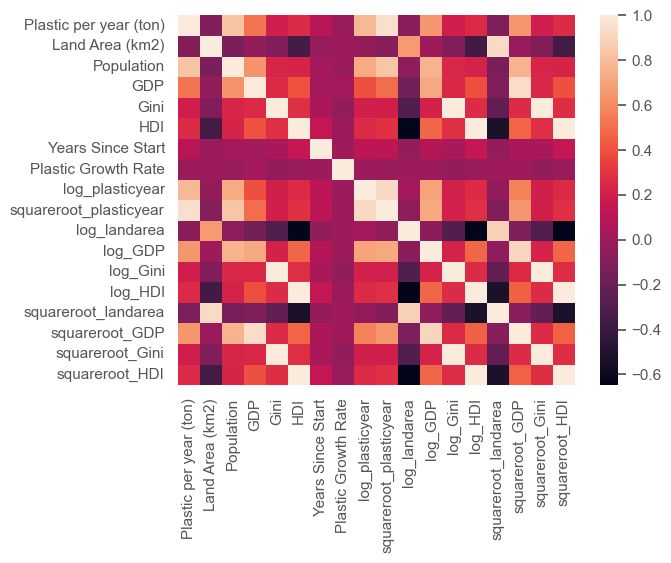

In [32]:
sns.heatmap(corr_matrix)

### Discover relationships (e.g. log pop & log plastic have higher coef so use that instead of without log transform)

In [33]:
corr_matrix.loc[['Plastic per year (ton)','log_plasticyear', 'squareroot_plasticyear'],:]

,Plastic per year (ton),Land Area (km2),Population,GDP,Gini,HDI,Years Since Start,Plastic Growth Rate,log_plasticyear,squareroot_plasticyear,log_landarea,log_GDP,log_Gini,log_HDI,squareroot_landarea,squareroot_GDP,squareroot_Gini,squareroot_HDI
Plastic per year (ton),1.000000,-0.105880,0.830552,0.523487,0.197681,0.263372,0.105239,-0.013002,0.783569,0.953139,-0.071482,0.647427,0.200882,0.257722,-0.123876,0.641098,0.199533,0.260690
log_plasticyear,0.783569,-0.041270,0.723417,0.399237,0.203996,0.257844,0.119014,-0.008341,1.000000,0.920692,0.016429,0.691213,0.210181,0.254723,-0.046016,0.571270,0.207399,0.256418
squareroot_plasticyear,0.953139,-0.093415,0.836791,0.491647,0.202633,0.285956,0.121680,-0.013954,0.920692,1.000000,-0.049699,0.719729,0.209066,0.282024,-0.109952,0.650021,0.206141,0.284132


- population x plasticperyear at around 0.8
- log gdp x square plasticperyear at around 0.7
- square land area x plastic per year at around -0.12 (largest magnitude)
- log gini x log plasticperyear (but Gini all very low at 0.2ish no matter what combination)
- hdi x square plasticperyear (but HDI also all very low at almost 0.3 no matter what combination)

### Checking for collinearly (high corr between feature A and B = only use one or the other)

- Variables with highest correlation is population and plastic per year, which just shows it is a good feature to estimate the target variable
- All other combinations have correlation coefficient of 0.7 or lower.
- **So, no collinear features!**

# Indicator x plastic pollution relationship w/ best combinations found

### Land area - square transform

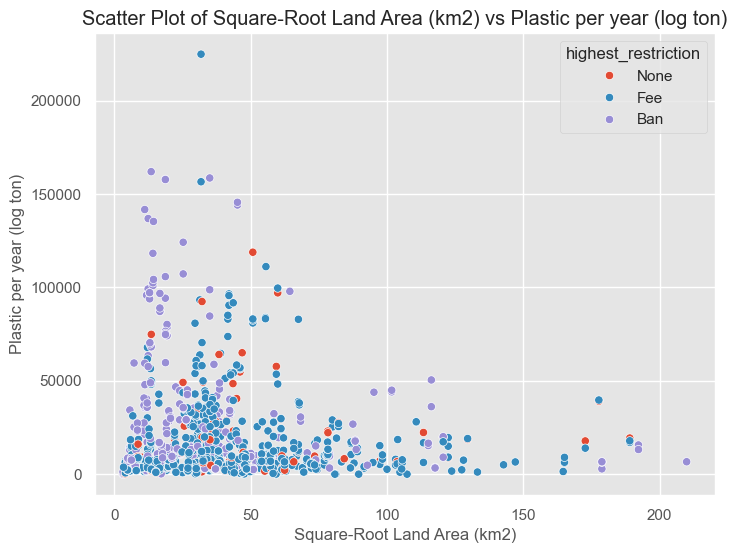

In [34]:
# Create scatter plot between Land Area and Plastic per year
plt.figure(figsize=(8, 6))
sns.scatterplot(x='squareroot_landarea', y='Plastic per year (ton)', data=merged_data, hue='highest_restriction')
plt.title('Scatter Plot of Square-Root Land Area (km2) vs Plastic per year (log ton)')
plt.xlabel('Square-Root Land Area (km2)')
plt.ylabel('Plastic per year (log ton)')
plt.grid(True)
plt.show()

## Population

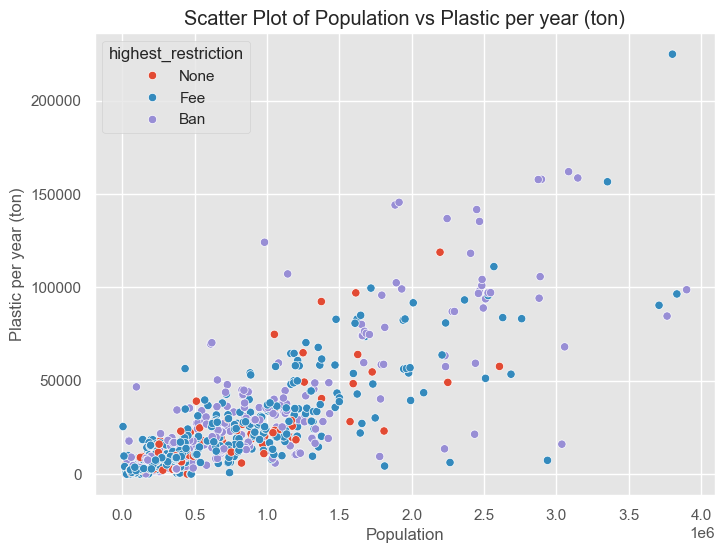

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Population', y='Plastic per year (ton)', data=merged_data, hue='highest_restriction')
plt.title('Scatter Plot of Population vs Plastic per year (ton)')
plt.xlabel('Population')
plt.ylabel('Plastic per year (ton)')
plt.grid(True)
plt.show()

### GDP -- log transform GDP

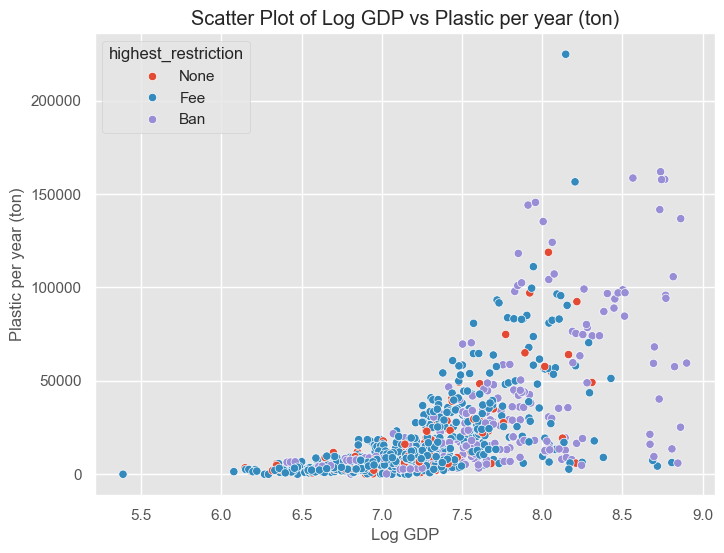

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='log_GDP', y='Plastic per year (ton)', data=merged_data, hue='highest_restriction')
plt.title('Scatter Plot of Log GDP vs Plastic per year (ton)')
plt.xlabel('Log GDP')
plt.ylabel('Plastic per year (ton)')
plt.grid(True)
plt.show()

### Gini -- log gini

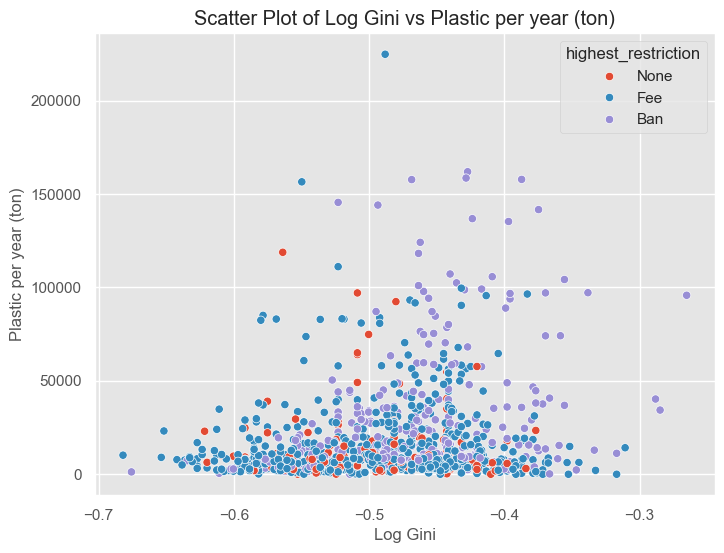

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='log_Gini', y='Plastic per year (ton)', data=merged_data, hue='highest_restriction')
plt.title('Scatter Plot of Log Gini vs Plastic per year (ton)')
plt.xlabel('Log Gini')
plt.ylabel('Plastic per year (ton)')
plt.grid(True)
plt.show()

### HDI

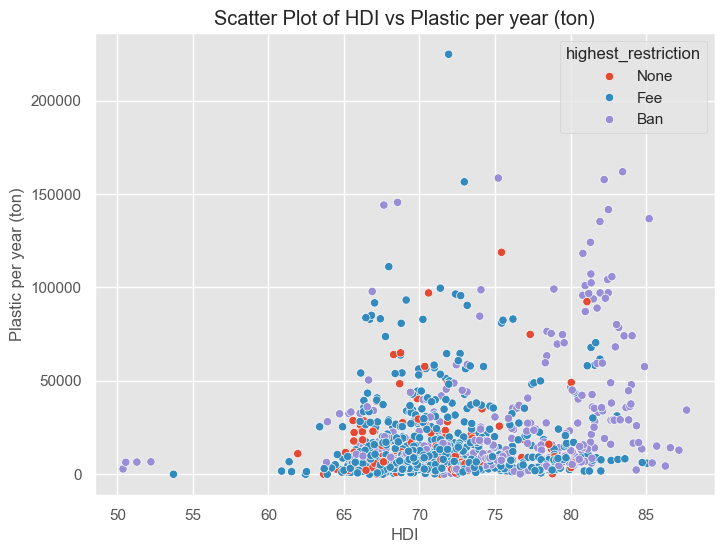

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='HDI', y='Plastic per year (ton)', data=merged_data, hue='highest_restriction')
plt.title('Scatter Plot of HDI vs Plastic per year (ton)')
plt.xlabel('HDI')
plt.ylabel('Plastic per year (ton)')
plt.grid(True)
plt.show()

## NOW THAT DONE W STEP 1) Discover relationships -- STEP 2) Regularization, STEP 3) Fit model (next notebook)

In [39]:
# our ds we should model with is the original merged data with additional: log gini, log gdp, sqroot land area
initialdf = merged_data.drop(['log_plasticyear', 'squareroot_plasticyear','log_landarea', 'log_HDI',
                              'squareroot_GDP', 'squareroot_Gini', 'squareroot_HDI'],axis=1)
initialdf

,Year,Province,Regency/City,Plastic per day (ton),Plastic per year (ton),Land Area (km2),Population,GDP,Gini,HDI,highest_restriction,start_date,Years Since Start,Plastic Growth Rate,log_GDP,log_Gini,squareroot_landarea
0,2019,Aceh,ACEH SELATAN,17.468853,6375.918288,4175.38,238081.0,5.479426e+06,0.273,66.90,None,2019,0,NaN,6.738735,-0.563837,64.617180
1,2019,Aceh,ACEH TENGAH,25.242500,9213.435000,4468.42,212494.0,7.472446e+06,0.256,73.14,None,2019,0,NaN,6.873463,-0.591760,66.846241
2,2019,Aceh,SIMEULUE,15.495900,5655.559350,1821.75,93228.0,2.211886e+06,0.340,65.70,None,2019,0,NaN,6.344763,-0.468521,42.681963
3,2019,Aceh,GAYO LUES,6.398800,2335.562000,5541.29,94100.0,2.608734e+06,0.290,66.87,None,2019,0,NaN,6.416430,-0.537602,74.439841
4,2019,Aceh,BENER MERIAH,11.816469,4312.692510,1907.40,148175.0,4.423115e+06,0.267,72.97,None,2019,0,NaN,6.645728,-0.573489,43.673791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2022,Sumatera Utara,HUMBANG HASUNDUTAN,7.712900,2814.984900,2351.51,202299.0,6.919485e+06,0.258,70.32,Fee,2020,2,3.977648,6.840074,-0.588380,48.492371
1030,2022,Sumatera Utara,KOTA MEDAN,243.683302,88944.436534,279.29,2494512.0,2.801590e+08,0.399,81.76,Ban,2019,3,-8.069556,8.447405,-0.399027,16.711972
1031,2022,Sumatera Utara,KOTA PEMATANG SIANTAR,24.143000,8812.144000,75.92,274056.0,1.520831e+07,0.321,79.70,Fee,2020,2,3.608898,7.182081,-0.493495,8.713208
1032,2022,Sumatera Utara,KOTA TEBING TINGGI,20.750895,7573.785300,39.17,177785.0,6.931267e+06,0.334,76.17,Ban,2018,4,0.910851,6.840813,-0.476254,6.258594


In [40]:
initialdf.to_csv("FEmerged_20182022.csv", index=False)

# [Archive]

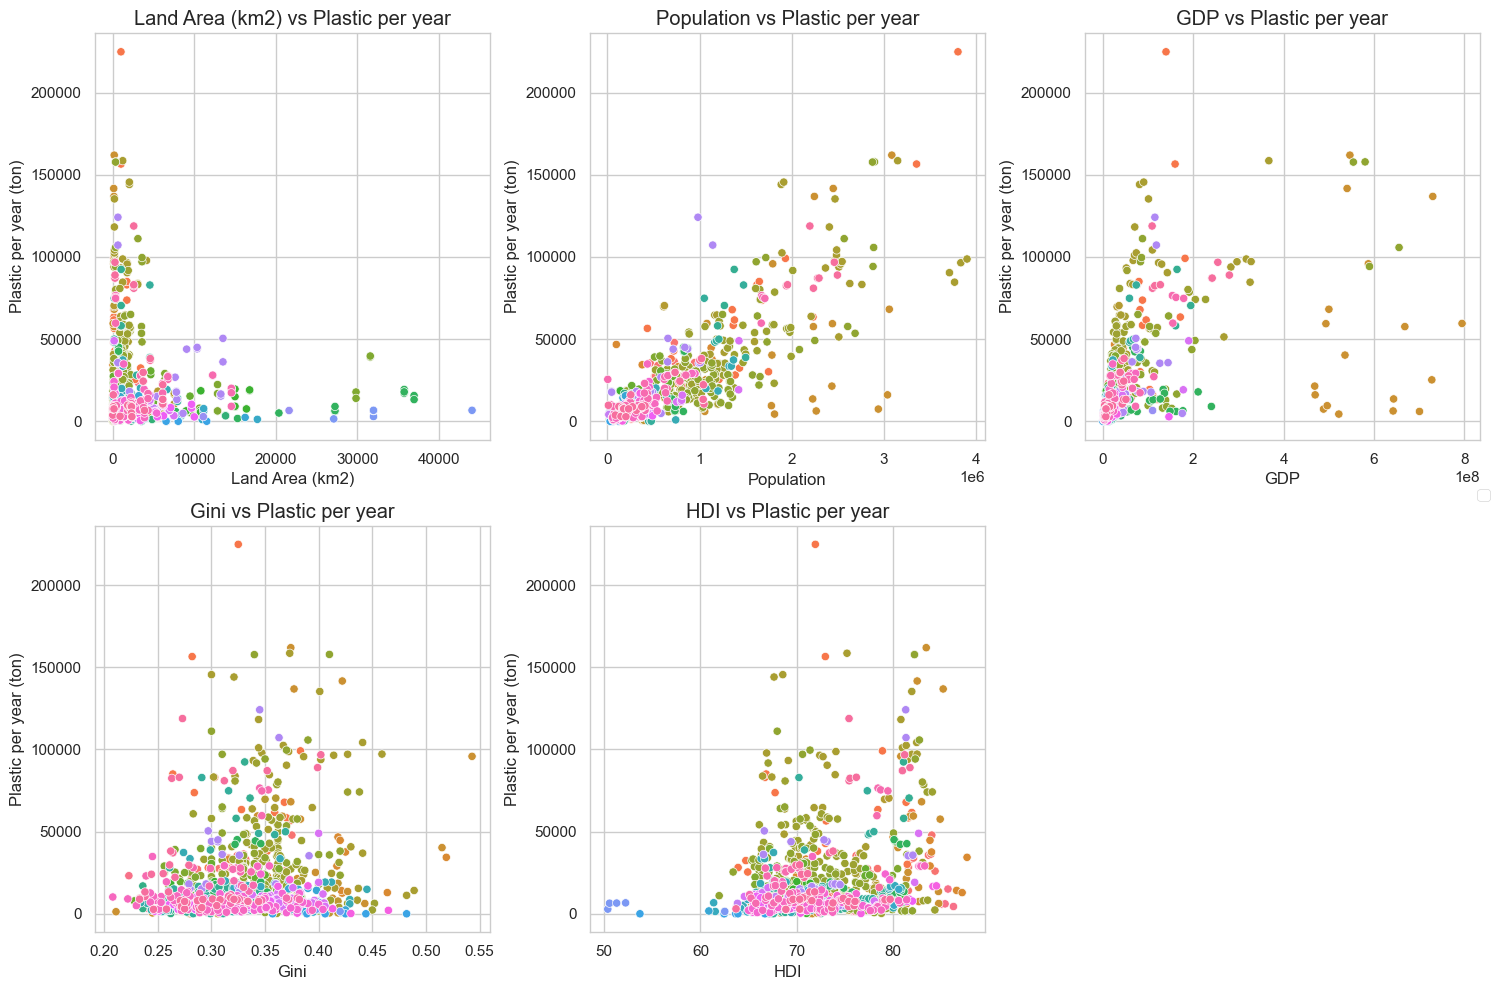

In [35]:
# # Selecting relevant columns for scatter plots
# indicators = ['Land Area (km2)', 'Population', 'GDP', 'Gini', 'HDI']

# # Set the style of seaborn
# sns.set_style("whitegrid")

# # Create a new figure
# fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# # Flatten the axes for easy iteration
# axes = axes.flatten()

# # Iterate over the indicators
# for i, indicator in enumerate(indicators):
#     # Create scatter plot for each indicator
#     sns.scatterplot(ax=axes[i], x=indicator, y='Plastic per year (ton)', data=merged_data, hue='Province', legend=False)
#     axes[i].set_title(f'{indicator} vs Plastic per year')
#     axes[i].set_xlabel(indicator)
#     axes[i].set_ylabel('Plastic per year (ton)')

#     # Remove empty subplot
#     if i == len(indicators) - 1:
#         for j in range(i+1, len(axes)):
#             fig.delaxes(axes[j])

# # [NEED TO FIGURE THIS OUT!!!]
# # Get the legend handles and labels from the first subplot
# handles, labels = axes[0].get_legend_handles_labels()
# # Add a single legend outside the subplots
# fig.legend(handles, labels, loc='center right')


# # Adjust layout
# plt.tight_layout()
# plt.show()